<a href="https://colab.research.google.com/github/blancavazquez/taller-linux/blob/main/vision/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de selección de características



#### Libreta original creada por Dr Jorge Perez IIMAS-UNAM.
Se adicionó la sección de "selección de características" por Blanca Vázquez.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

* Importar Librerias


In [ ]:
# Librerias
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from PIL import Image
from skimage.color import rgb2gray

* Leer imágenes de entrenamiento

In [ ]:
im1= skio.imread("auto/im11.png")
im2= skio.imread("auto/im12.png")
im3= skio.imread("auto/im13.png")

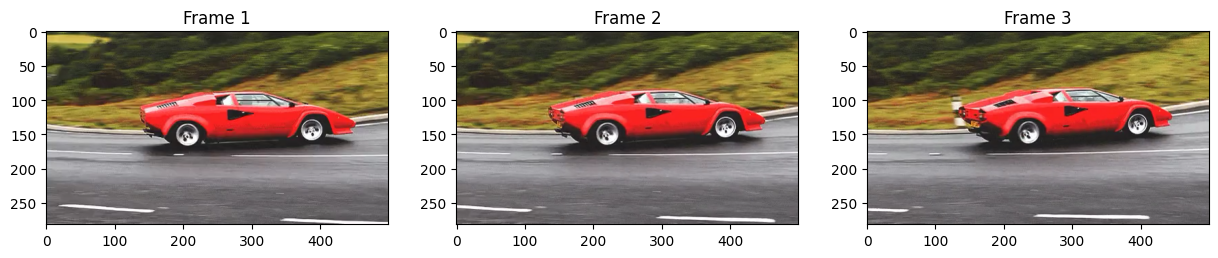

Tamaño original de cada frame:  (282, 500, 3)


In [ ]:
#Plotting frames
plt.figure(figsize=(15,15))

#Frame 1
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1)

#Frame 2
plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2)

#Frame 3

plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3)
plt.show()

print("Tamaño original de cada frame: ", im1.shape)

* Funcion para concatenación y aplanamiento

In [ ]:
def imagen2vector(imagen1, imagen2, imagen3):
    v1=imagen1.flatten()
    v2=imagen2.flatten()
    v3=imagen3.flatten()
    img_vec = np.concatenate((v1, v2, v3), axis=0)
    img_vec=img_vec[:,np.newaxis]
    return img_vec

## 1 Extraccion de caracteristicas

* Componentes RGB

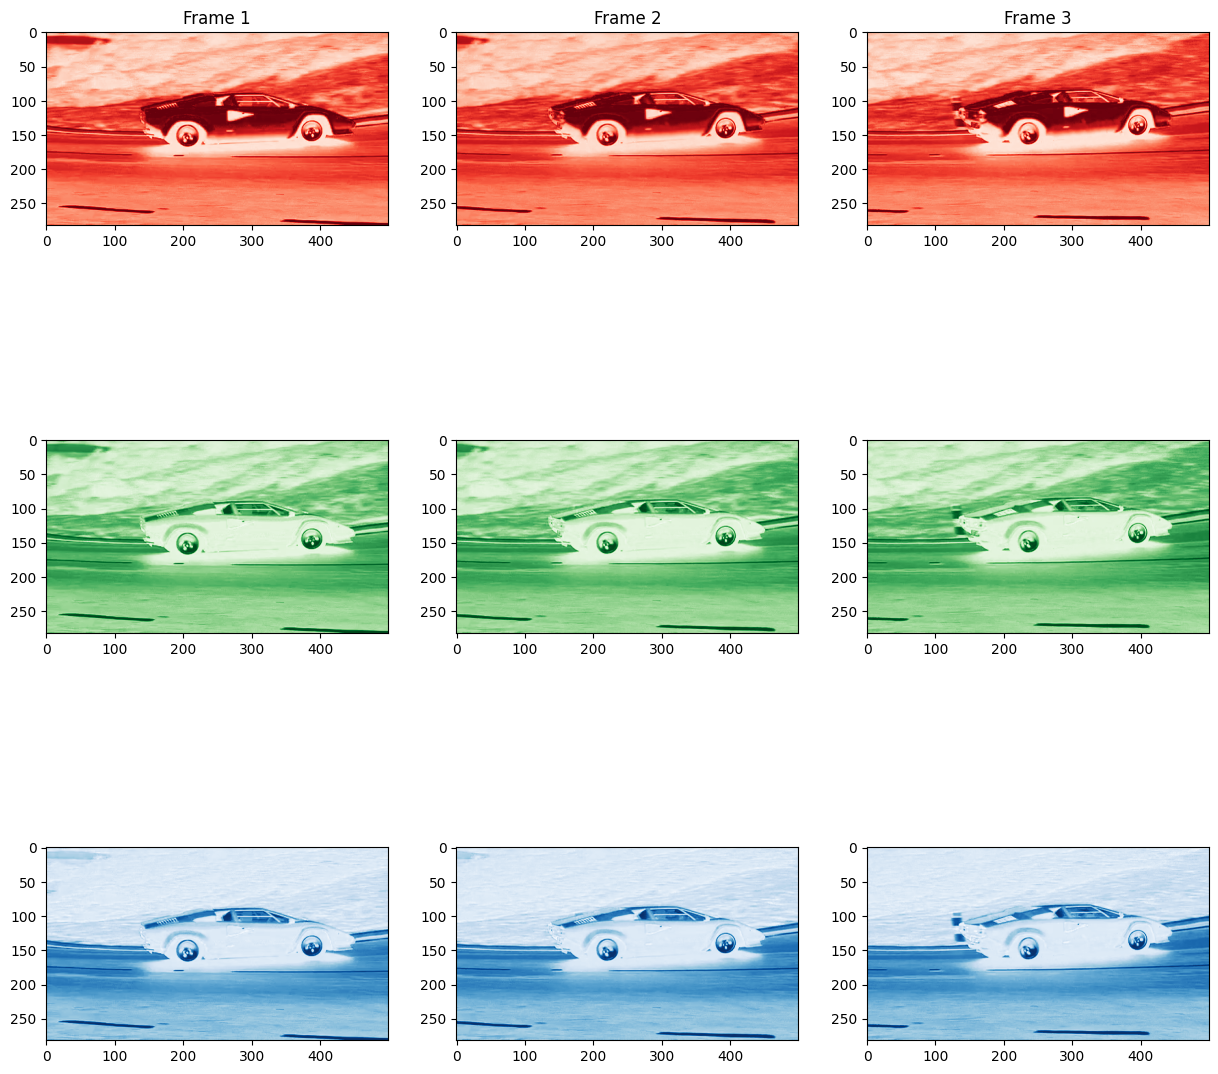

Tamaño:  (423000, 1)


In [ ]:
#Extraer los componente RGB de cada frame

#Frame 1
im1_r = im1[:, :, 0]
im1_g = im1[:, :, 1]
im1_b = im1[:, :, 2]
#Frame 2
im2_r = im2[:, :, 0]
im2_g = im2[:, :, 1]
im2_b = im2[:, :, 2]
#Frame 3
im3_r = im3[:, :, 0]
im3_g = im3[:, :, 1]
im3_b = im3[:, :, 2]

#Plotting el mismo canal por cada frame
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('Frame 1')
plt.imshow(im1_r, cmap='Reds')
plt.subplot(3,3,4)
plt.imshow(im1_g, cmap='Greens')
plt.subplot(3,3,7)
plt.imshow(im1_b, cmap='Blues')

plt.subplot(3,3,2)
plt.title('Frame 2')
plt.imshow(im2_r, cmap='Reds')
plt.subplot(3,3,5)
plt.imshow(im2_g, cmap='Greens')
plt.subplot(3,3,8)
plt.imshow(im2_b, cmap='Blues')

plt.subplot(3,3,3)
plt.title('Frame 3')
plt.imshow(im3_r, cmap='Reds')
plt.subplot(3,3,6)
plt.imshow(im3_g, cmap='Greens')
plt.subplot(3,3,9)
plt.imshow(im3_b, cmap='Blues')
plt.show()


im_r=imagen2vector(im1_r,im2_r,im3_r)
im_g=imagen2vector(im1_g,im2_g,im3_g)
im_b=imagen2vector(im1_b,im2_b,im3_b)

print("Tamaño: ", im_r.shape)

* Componentes HSV

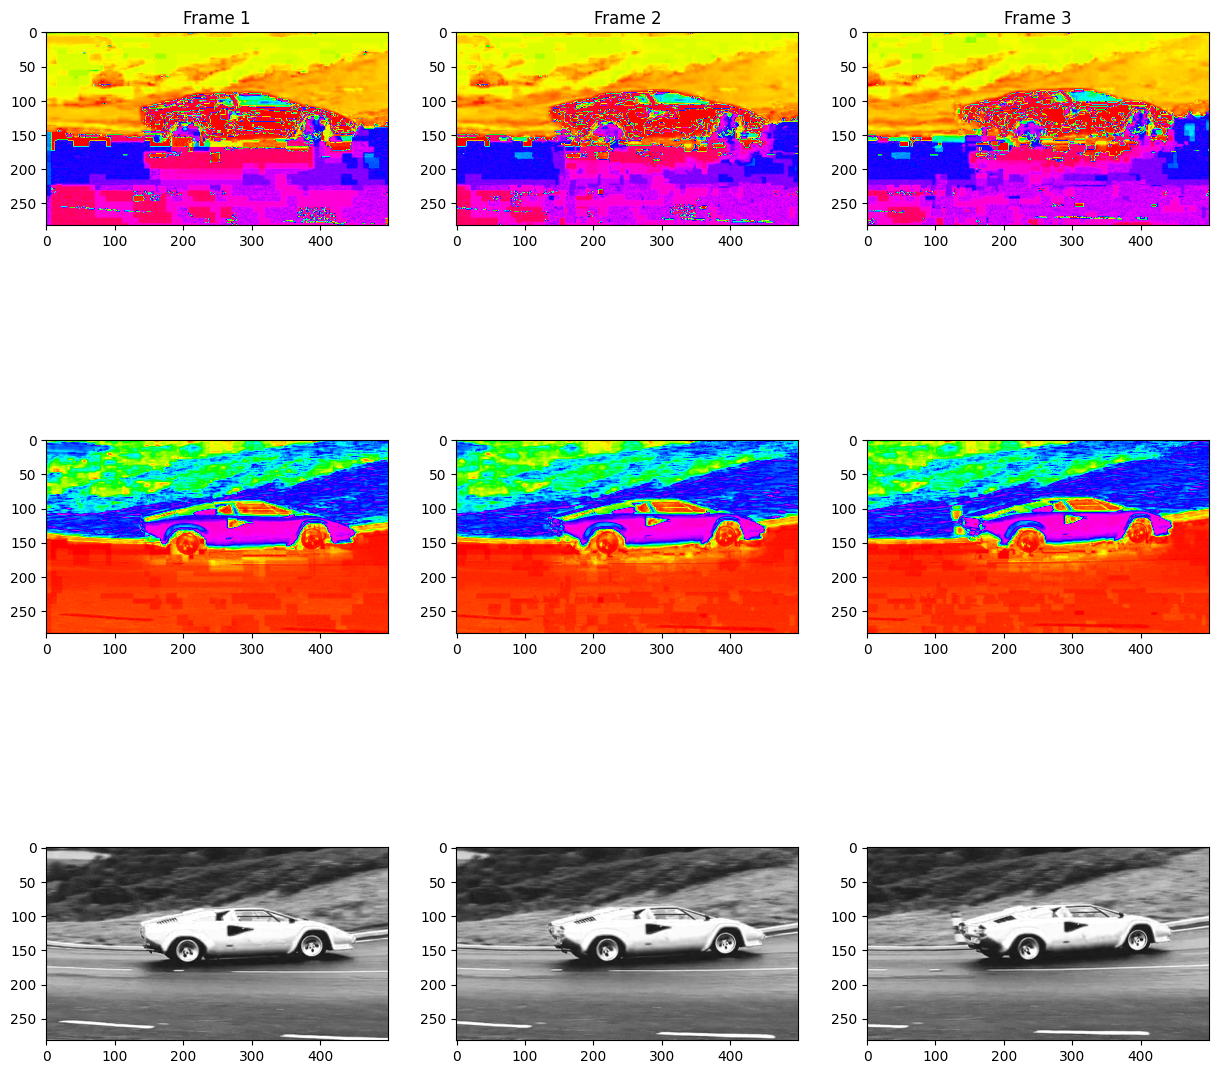

In [ ]:
from skimage.color import rgb2hsv
hsv_img1 = rgb2hsv(im1)
hsv_img2 = rgb2hsv(im2)
hsv_img3 = rgb2hsv(im3)

hue_img1 = hsv_img1[:, :, 0]
sat_img1 = hsv_img1[:, :, 1]
value_img1 = hsv_img1[:, :, 2]

hue_img2 = hsv_img2[:, :, 0]
sat_img2 = hsv_img2[:, :, 1]
value_img2 = hsv_img2[:, :, 2]

hue_img3 = hsv_img3[:, :, 0]
sat_img3 = hsv_img3[:, :, 1]
value_img3 = hsv_img3[:, :, 2]

#Plotting HUE (Matiz)
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
plt.title('Frame 1')
plt.imshow(hue_img1, cmap='hsv')
plt.subplot(3,3,4)
plt.imshow(sat_img1, cmap='hsv')
plt.subplot(3,3,7)
plt.imshow(value_img1, cmap='gray')

#Plotting saturación
plt.subplot(3,3,2)
plt.title('Frame 2')
plt.imshow(hue_img2, cmap='hsv')
plt.subplot(3,3,5)
plt.imshow(sat_img2, cmap='hsv')
plt.subplot(3,3,8)
plt.imshow(value_img2, cmap='gray')

#Plotting valor
plt.subplot(3,3,3)
plt.title('Frame 3')
plt.imshow(hue_img3, cmap='hsv')
plt.subplot(3,3,6)
plt.imshow(sat_img3, cmap='hsv')
plt.subplot(3,3,9)
plt.imshow(value_img3, cmap='gray')
plt.show()

#Concatenando cada componente del mismo tipo
im_hue=imagen2vector(hue_img1,hue_img2,hue_img3)
im_sat=imagen2vector(sat_img1,sat_img2,sat_img3)
im_value=imagen2vector(value_img1,value_img1,value_img3)

* Escala de grices

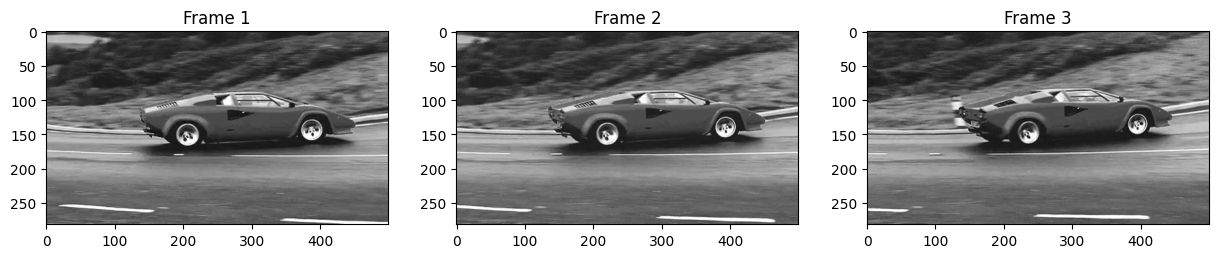

In [ ]:
#Convertir una imagen a escala de grises
im1g = rgb2gray(im1)
im2g = rgb2gray(im2)
im3g = rgb2gray(im3)

#Frame 1
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1g, cmap='gray')

#Frame 3
plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2g, cmap='gray')

#Frame 3
plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3g, cmap='gray')
plt.show()

#Concatenando componentes del mismo tipo
im_gray=imagen2vector(im1g,im2g,im3g)

* Filtro de mediana

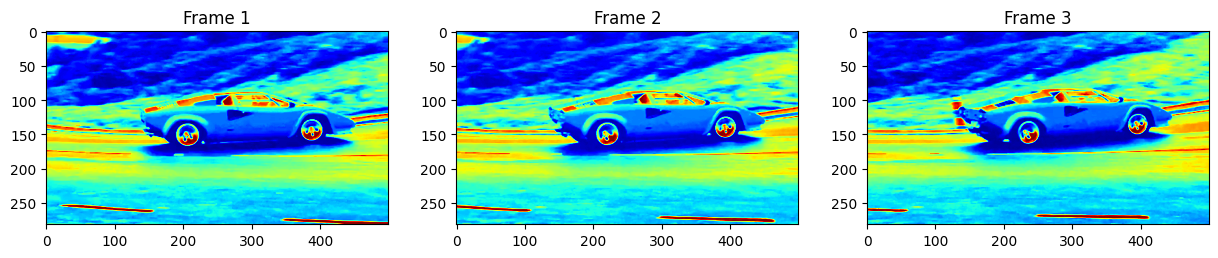

In [ ]:
from skimage.morphology import disk
from skimage.filters import median

#Return local median of an image.
im1m = median(im1g)
im2m = median(im2g)
im3m = median(im3g)

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1m, cmap='jet')

plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2m, cmap='jet')

plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3m, cmap='jet')
plt.show()

#Concatenando componentes del mismo tipo
im_median=imagen2vector(im1m,im2m,im3m)

* Filtro de Entropia

/home/blanca/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


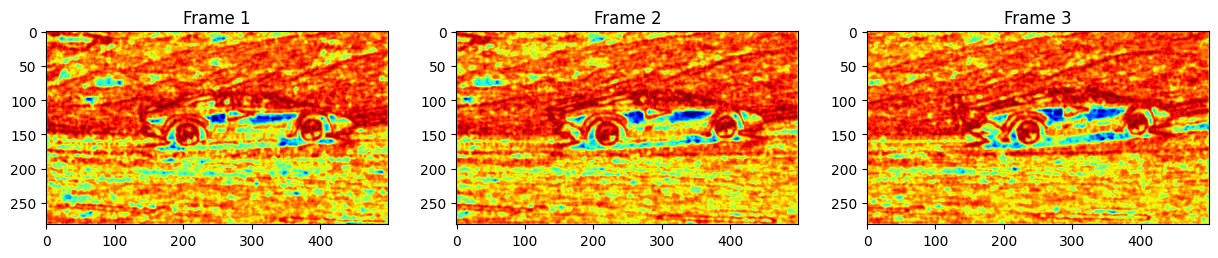

In [ ]:
from skimage.filters.rank import entropy

#The entropy is computed using base 2 logarithm i.e.
#the filter returns the minimum number of bits needed to encode the local gray level distribution.
im1e = entropy(im1g, disk(3))
im2e = entropy(im2g, disk(3))
im3e = entropy(im3g, disk(3))

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1e, cmap='jet')

plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2e, cmap='jet')

plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3e, cmap='jet')
plt.show()

#Concatena componentes del mismo tipo
im_entropy=imagen2vector(im1e,im2e,im3e)

* Bordes de Sobel

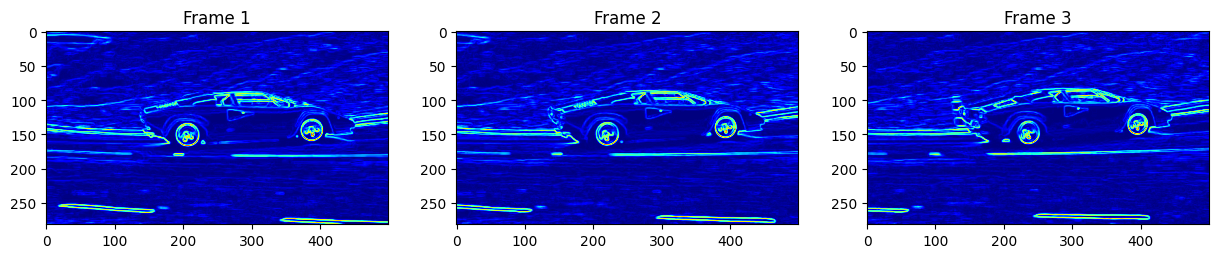

In [ ]:
from skimage.filters import sobel

#Find edges in an image using the Sobel filter.
im1so = sobel(im1g)
im2so = sobel(im2g)
im3so = sobel(im3g)

#Frame 1
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1so, cmap='jet')

#Frame 2
plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2so, cmap='jet')

#Frame 3
plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3so, cmap='jet')
plt.show()

#Concatena componentes del mismo tipo
im_sobel=imagen2vector(im1so,im2so,im3so)

* Patrones locales binarios

/home/blanca/.local/lib/python3.10/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


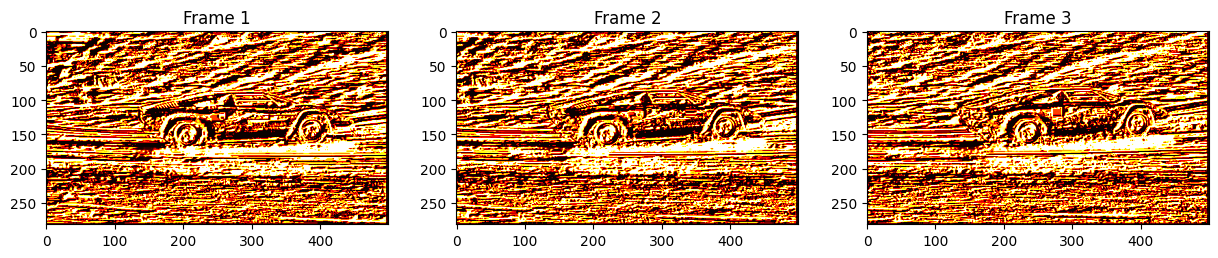

In [ ]:
from skimage.feature import local_binary_pattern

#for texture classification
radius = 3
n_points = 8 * radius
im1_lp = local_binary_pattern(im1g, n_points, radius)
im2_lp = local_binary_pattern(im2g, n_points, radius)
im3_lp = local_binary_pattern(im3g, n_points, radius)

#Frame 1
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(im1_lp, cmap='hot')

#Frame 2
plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(im2_lp, cmap='hot')

#Frame 3
plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(im3_lp, cmap='hot')
plt.show()

#Concatena componentes del mismo tipo
im_local_bin=imagen2vector(im1_lp,im2_lp,im3_lp)

* Etiquetas/Anotaciones/Máscaras/Labels

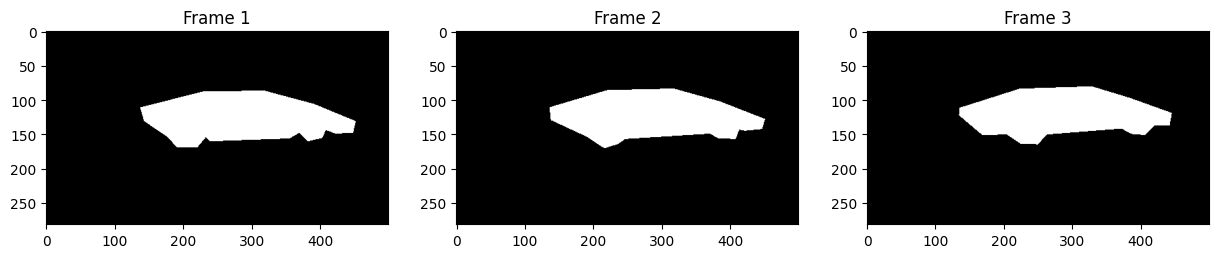

Etiqueta:  (423000, 1)
Etiqueta:  (423000, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Cargamos las imágenes con forma segmentada de auto
label_im1= skio.imread("auto/seg11.png")
label_im2= skio.imread("auto/seg12.png")
label_im3= skio.imread("auto/seg13.png")

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Frame 1')
plt.imshow(label_im1, cmap='gray')

plt.subplot(1,3,2)
plt.title('Frame 2')
plt.imshow(label_im2, cmap='gray')

plt.subplot(1,3,3)
plt.title('Frame 3')
plt.imshow(label_im3, cmap='gray')
plt.show()

#concatenamos las 3 etiquetas
im_label=imagen2vector(label_im1,label_im2,label_im3)
print("Etiqueta: ", im_label.shape)

#Escala los valores de la etiqueta a un rango por defecto de 0 a 1.
im_label = MinMaxScaler().fit_transform(im_label)
print("Etiqueta: ", im_label.shape)

* Ordenamiento de los datos

In [ ]:
# Ordenamiento de los datos
import pandas as pd
#Concatenando todas las características previamente construidas
data = np.concatenate([im_r, im_g, im_b,im_hue, im_sat, im_value, im_gray,im_median,im_entropy,im_sobel,im_local_bin,im_label], axis = 1)
df = pd.DataFrame(data, columns=["Rojo", "Verde","Azul","Hue", "Saturation","Valor", "Grices","Mediana","Entropia","Sobel","Patrones_locales","Labels"])

#Visualizando DF
df

Rojo  Verde  Azul       Hue  Saturation     Valor    Grices  \
0       101.0   99.0  72.0  0.155172    0.287129  0.396078  0.382268   
1       105.0  102.0  76.0  0.149425    0.276190  0.411765  0.395149   
2       110.0  107.0  81.0  0.149425    0.263636  0.431373  0.414756   
3       114.0  112.0  85.0  0.155172    0.254386  0.447059  0.433248   
4       122.0  120.0  93.0  0.155172    0.237705  0.478431  0.464621   
...       ...    ...   ...       ...         ...       ...       ...   
422995   90.0   87.0  90.0  0.833333    0.033333  0.352941  0.344525   
422996   90.0   87.0  90.0  0.833333    0.033333  0.352941  0.344525   
422997   90.0   87.0  90.0  0.833333    0.033333  0.352941  0.344525   
422998   89.0   86.0  89.0  0.833333    0.033708  0.349020  0.340603   
422999   89.0   86.0  89.0  0.833333    0.033708  0.349020  0.340603   

         Mediana  Entropia     Sobel  Patrones_locales  Labels  
0       0.382268  3.459432  0.069689               1.0     0.0  
1       0.382268  3.807355  0.076497               1.0     0.0  
2       0.395149  4.087463  0.083973               1.0     0.0  
3       0.414756  4.169925  0.095359               1.0     0.0  
4       0.433248  4.058814  0.106739               1.0     0.0  
...          ...       ...       ...               ...     ...  
422995  0.344525  2.572431  0.008611            8162.0     0.0  
422996  0.344525  2.794653  0.007730            8160.0     0.0  
422997  0.344525  2.698660  0.007938            8160.0     0.0  
422998  0.344525  2.753434  0.006807            7648.0     0.0  
422999  0.340603  2.845351  0.003594            7360.0     0.0  

[423000 rows x 12 columns]

In [ ]:
# Número de clases
print(df.groupby('Labels').size())

Labels
0.0    370530
1.0     52470
dtype: int64


In [ ]:
# Creando los conjuntos de datos X y Y
X_data = df.drop(['Labels'], axis=1)
array = df.values
y=array[:,-1] # Etiquetas
names=df.columns[0:-1]

print("X: ", X_data.shape)
print("y: ", y.shape)

X:  (423000, 11)
y:  (423000,)


In [ ]:
#Normalización de datos
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_data)

#Creando dataframe con los datos escalados
df_X_scaled= pd.DataFrame(X_scaled,columns = names)
print("df_X_scaled:", df_X_scaled.shape)
print("y: ", y.shape[0])

df_X_scaled: (423000, 11)
y:  423000


---------------------------------------------------------------------
## Selección de características (forward)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Definiendo un modelo de  KNN
knn = KNeighborsClassifier(n_jobs=-1)

# Instanciamos el selector de características y lo entrenamos
sfs_forward = SFS(knn, k_features=5, scoring='accuracy',forward = True).fit(df_X_scaled, y)

In [ ]:
#Visualizamos el rendimiento del selector de características
pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T

feature_idx                                          cv_scores  \
1              (6,)  [0.8480732860520095, 0.8943617021276595, 0.873...   
2            (0, 6)  [0.9323640661938535, 0.9453664302600473, 0.943...   
3        (0, 6, 10)  [0.9593026004728132, 0.9594208037825059, 0.967...   
4     (0, 2, 6, 10)  [0.964822695035461, 0.9633096926713948, 0.9699...   
5  (0, 2, 6, 7, 10)  [0.9657328605200945, 0.9632269503546099, 0.971...   

  avg_score                                    feature_names  ci_bound  \
1   0.87487                                        (Grices,)  0.020199   
2  0.940605                                   (Rojo, Grices)  0.014841   
3  0.959059                 (Rojo, Grices, Patrones_locales)  0.006855   
4  0.962738           (Rojo, Azul, Grices, Patrones_locales)  0.007666   
5  0.963948  (Rojo, Azul, Grices, Mediana, Patrones_locales)   0.00712   

    std_dev   std_err  
1  0.015716  0.007858  
2  0.011547  0.005774  
3  0.005333  0.002667  
4  0.005964  0.002982  
5   0.00554   0.00277

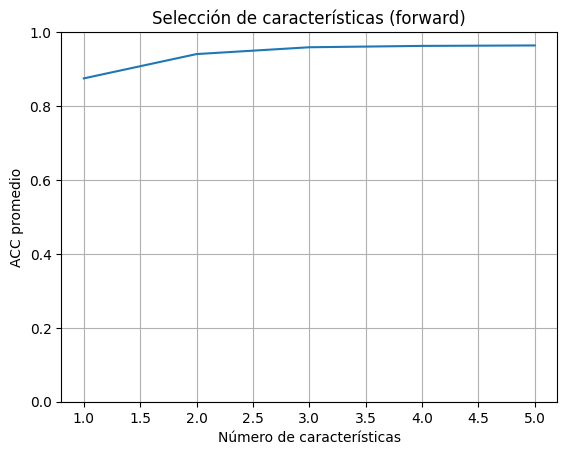

In [ ]:
df_feature_importance = pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T
auc_avg = df_feature_importance["avg_score"]

plt.plot(auc_avg)
plt.ylim([0, 1])
plt.title('Selección de características (forward)')
plt.xlabel("Número de características")
plt.ylabel("ACC promedio")
plt.grid()

In [ ]:
print('Mejor rendimiento obtenido: %.2f' % sfs_forward.k_score_)
print('Índices de las características seleccionadas:', sfs_forward.k_feature_idx_)
print('Características seleccionadas:', sfs_forward.k_feature_names_)

Mejor rendimiento obtenido: 0.96
Índices de las características seleccionadas: (0, 2, 6, 7, 10)
Características seleccionadas: ('Rojo', 'Azul', 'Grices', 'Mediana', 'Patrones_locales')


In [ ]:
# Selección de variables para SFS forward
variables=list(sfs_forward.k_feature_names_) #Variables seleccionadas por SFS forward
print("Variables: ", variables)
print("X_data: ", X_data.shape, "y:", y.shape)

Variables:  ['Rojo', 'Azul', 'Grices', 'Mediana', 'Patrones_locales']
X_data:  (423000, 11) y: (423000,)


In [ ]:
# Creación del conjunto con las características seleccionadas
X = X_data.loc[:,variables]
names=X.columns
print("X (subset):", X.shape, "names: ", len(names))

X (subset): (423000, 5) names:  5


In [ ]:
#### Partición de datos: entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_entrenamiento,X_test,Y_entrenamiento,Y_test=train_test_split(X,y,test_size=30,random_state=50)
print("X_entrenamiento: ",X_entrenamiento.shape, "Y_entrenamiento: ",Y_entrenamiento.shape)
print("X_test: ",X_test.shape, "Y_test: ",Y_test.shape)

X_entrenamiento:  (422970, 5) Y_entrenamiento:  (422970,)
X_test:  (30, 5) Y_test:  (30,)


---------------------------------------------------------------------

## Selección de características (backward)

In [ ]:
# Instanciamos el selector de características y lo entrenamos
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Definiendo un modelo de  KNN
knn = KNeighborsClassifier(n_jobs=-1)

sfs_backward = SFS(knn, k_features=5, scoring='accuracy',forward = False).fit(df_X_scaled, y)

In [ ]:
#Visualizamos el rendimiento del selector de características
pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

feature_idx  \
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   
10     (0, 1, 2, 3, 4, 6, 7, 8, 9, 10)   
9         (0, 1, 2, 3, 4, 7, 8, 9, 10)   
8            (0, 1, 3, 4, 7, 8, 9, 10)   
7               (0, 1, 3, 4, 7, 8, 10)   
6                  (1, 3, 4, 7, 8, 10)   
5                     (1, 3, 4, 8, 10)   

                                            cv_scores avg_score  \
11  [0.965886524822695, 0.9576595744680851, 0.9514...  0.958823   
10  [0.9672695035460993, 0.9685933806146572, 0.974...  0.968087   
9   [0.967434988179669, 0.968628841607565, 0.97434...   0.96818   
8   [0.9676004728132388, 0.9689952718676123, 0.974...  0.968416   
7   [0.9669621749408983, 0.9678486997635933, 0.973...  0.967643   
6   [0.96596926713948, 0.9677895981087471, 0.97290...  0.967156   
5   [0.9647281323877068, 0.9678605200945627, 0.971...  0.966442   

                                        feature_names  ci_bound   std_dev  \
11  (Rojo, Verde, Azul, Hue, Saturation, Valor, Gr...  0.006196  0.004821   
10  (Rojo, Verde, Azul, Hue, Saturation, Grices, M...  0.006356  0.004945   
9   (Rojo, Verde, Azul, Hue, Saturation, Mediana, ...  0.006173  0.004803   
8   (Rojo, Verde, Hue, Saturation, Mediana, Entrop...  0.005983  0.004655   
7   (Rojo, Verde, Hue, Saturation, Mediana, Entrop...  0.006355  0.004945   
6   (Verde, Hue, Saturation, Mediana, Entropia, Pa...  0.006159  0.004792   
5   (Verde, Hue, Saturation, Entropia, Patrones_lo...  0.006376  0.004961   

     std_err  
11   0.00241  
10  0.002472  
9   0.002401  
8   0.002327  
7   0.002472  
6   0.002396  
5    0.00248

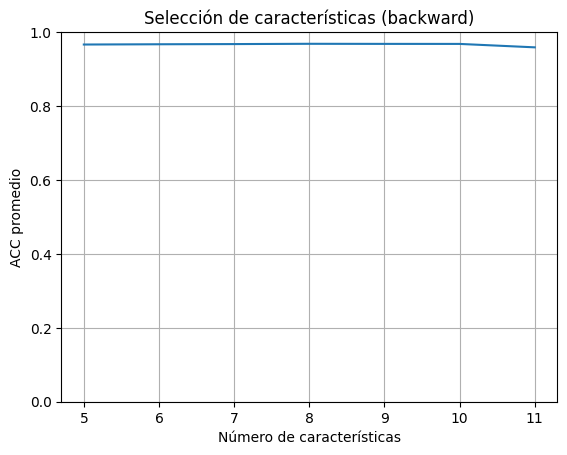

In [ ]:
df_feature_importance = pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T
auc_avg = df_feature_importance["avg_score"]

plt.plot(auc_avg)
plt.ylim([0, 1])
plt.title('Selección de características (backward)')
plt.xlabel("Número de características")
plt.ylabel("ACC promedio")
plt.grid()

In [ ]:
print('Mejor rendimiento obtenido: %.2f' % sfs_backward.k_score_)
print('Índices de las características seleccionadas:', sfs_backward.k_feature_idx_)
print('Características seleccionadas:', sfs_backward.k_feature_names_)

Mejor rendimiento obtenido: 0.97
Índices de las características seleccionadas: (1, 3, 4, 8, 10)
Características seleccionadas: ('Verde', 'Hue', 'Saturation', 'Entropia', 'Patrones_locales')


In [ ]:
# Selección de variables para SFS forward
variables=list(sfs_backward.k_feature_names_) #Variables seleccionadas por SFS forward
print("Variables: ", variables)
print("X: ", X_data.shape, "y:", y.shape)

Variables:  ['Verde', 'Hue', 'Saturation', 'Entropia', 'Patrones_locales']
X:  (423000, 11) y: (423000,)


In [ ]:
# Creación del conjunto con las características seleccionadas
X = X_data.loc[:,variables]
names=X.columns
print("X (subset):", X.shape, "names: ", len(names))

X (subset): (423000, 5) names:  5


In [ ]:
#Partición de datos: entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_entrenamiento,X_test,Y_entrenamiento,Y_test=train_test_split(X,y,test_size=30,random_state=50)
print("X_entrenamiento: ",X_entrenamiento.shape, "Y_entrenamiento: ",Y_entrenamiento.shape)
print("X_test: ",X_test.shape, "Y_test: ",Y_test.shape)

X_entrenamiento:  (422970, 5) Y_entrenamiento:  (422970,)
X_test:  (30, 5) Y_test:  (30,)


---------------------------------------------------------------------

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_X_scaled)
resultados = pca.transform(df_X_scaled)
resultados

array([[-0.65267665,  0.25273217],
       [-0.48982351,  0.4867789 ],
       [-0.24045366,  0.68433631],
       ...,
       [-0.59846329, -2.02598443],
       [-0.63552568, -2.00364119],
       [-0.64649886, -1.96291388]])

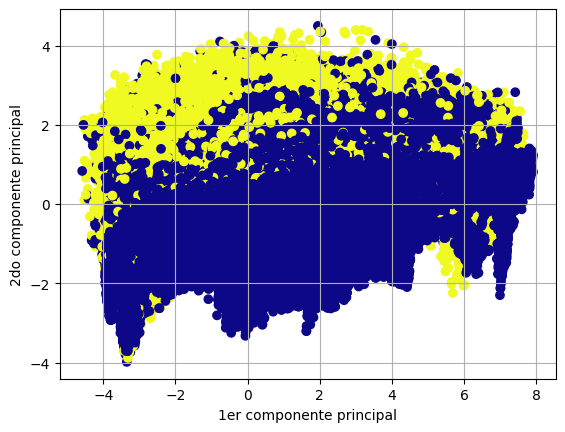

In [ ]:
plt.scatter(resultados[:,0],resultados[:,1],c = y , cmap = "plasma")
plt.xlabel("1er componente principal")
plt.ylabel("2do componente principal")
plt.grid(True)

In [ ]:
pca.components_

array([[ 0.34983327,  0.41036683,  0.39761626,  0.17889116, -0.15347451,
         0.32291097,  0.43156717,  0.42868347,  0.02835262,  0.11326244,
        -0.08739048],
       [ 0.28169943,  0.00467937, -0.2578069 , -0.46811077,  0.58899244,
         0.26796795,  0.05657559,  0.05485441,  0.38603074,  0.24465717,
        -0.03501236]])

<Axes: >

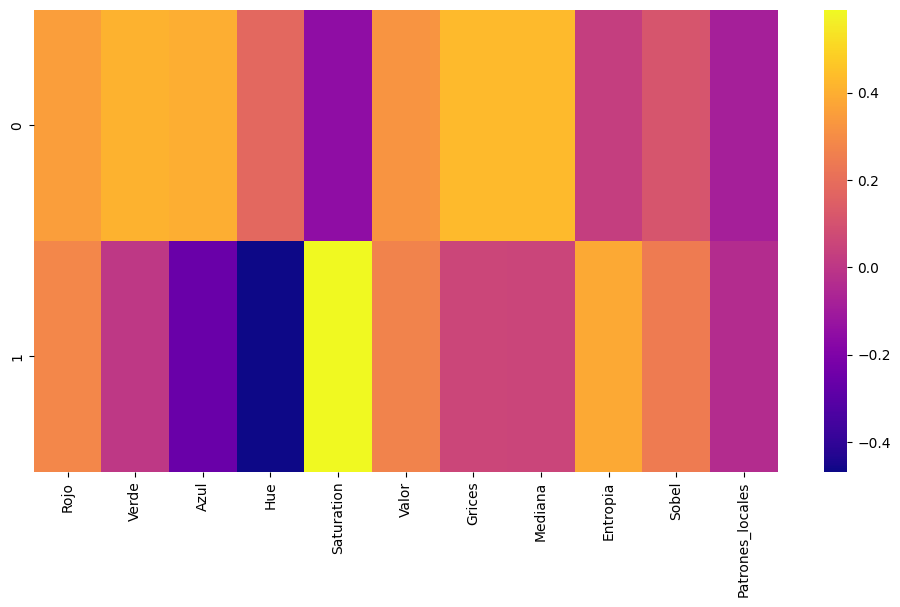

In [ ]:
import seaborn as sns
df = pd.DataFrame(pca.components_, columns = X_data.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df, cmap="plasma")

In [ ]:
# Selección de variables para PCA
print("df_X_scaled:", df_X_scaled.shape)
print("y: ", y.shape)

from sklearn.model_selection import train_test_split
X_entrenamiento,X_test,Y_entrenamiento,Y_test=train_test_split(resultados,y,test_size=30,random_state=50)
print("X_entrenamiento: ",X_entrenamiento.shape, "Y_entrenamiento: ",Y_entrenamiento.shape)
print("X_test: ",X_test.shape, "Y_test: ",Y_test.shape)

df_X_scaled: (423000, 11)
y:  (423000,)
X_entrenamiento:  (422970, 2) Y_entrenamiento:  (422970,)
X_test:  (30, 2) Y_test:  (30,)


---------------------------------------------------------------------

## 2 Clasificación / entrenamiento

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier(n_neighbors=49, n_jobs=-1) #K=50?? (vecinos)
clf.fit(X_entrenamiento, Y_entrenamiento)

KNeighborsClassifier(n_jobs=-1, n_neighbors=49)

## 3 Validación

In [ ]:
from sklearn.model_selection import cross_val_score
print ('Accuracy:')
print((clf.score(X_test,Y_test))*100)

Accuracy:
86.66666666666667


In [ ]:
Y_pred=clf.predict(X_test)
Y_predn=Y_pred[:,np.newaxis]
Y_testn=Y_test[:,np.newaxis]
resultados=np.concatenate([Y_predn, Y_testn], axis = 1)
resul = pd.DataFrame(resultados, columns=["Predicciones", "Reales"])
resul

Predicciones  Reales
0            0.0     0.0
1            0.0     0.0
2            0.0     0.0
3            0.0     0.0
4            1.0     0.0
5            0.0     0.0
6            0.0     0.0
7            0.0     0.0
8            0.0     0.0
9            0.0     0.0
10           0.0     0.0
11           0.0     0.0
12           0.0     0.0
13           1.0     0.0
14           0.0     0.0
15           0.0     0.0
16           0.0     0.0
17           0.0     1.0
18           0.0     0.0
19           0.0     0.0
20           0.0     0.0
21           0.0     0.0
22           0.0     0.0
23           0.0     0.0
24           0.0     0.0
25           0.0     0.0
26           0.0     0.0
27           0.0     0.0
28           0.0     1.0
29           0.0     0.0

In [ ]:
Y_proba=clf.predict_proba(X_test)
Proba_1=Y_proba[:,0] #Clase 0
Proba_0=Y_proba[:,1] #Clase 1

Proba_0=(Proba_0[:,np.newaxis])*100
Proba_1=(Proba_1[:,np.newaxis])*100

resultados2=np.concatenate([Y_predn, Y_testn, Proba_1, Proba_0], axis = 1)
resul2 = pd.DataFrame(resultados2, columns=["Predicciones", "Reales","% Fondo","% Auto"])
resul2

Predicciones  Reales     % Fondo     % Auto
0            0.0     0.0   75.510204  24.489796
1            0.0     0.0   97.959184   2.040816
2            0.0     0.0   79.591837  20.408163
3            0.0     0.0  100.000000   0.000000
4            1.0     0.0   44.897959  55.102041
5            0.0     0.0  100.000000   0.000000
6            0.0     0.0   97.959184   2.040816
7            0.0     0.0  100.000000   0.000000
8            0.0     0.0   97.959184   2.040816
9            0.0     0.0   95.918367   4.081633
10           0.0     0.0   63.265306  36.734694
11           0.0     0.0  100.000000   0.000000
12           0.0     0.0   73.469388  26.530612
13           1.0     0.0   48.979592  51.020408
14           0.0     0.0   75.510204  24.489796
15           0.0     0.0  100.000000   0.000000
16           0.0     0.0  100.000000   0.000000
17           0.0     1.0   55.102041  44.897959
18           0.0     0.0  100.000000   0.000000
19           0.0     0.0   95.918367   4.081633
20           0.0     0.0   87.755102  12.244898
21           0.0     0.0   97.959184   2.040816
22           0.0     0.0  100.000000   0.000000
23           0.0     0.0   87.755102  12.244898
24           0.0     0.0   85.714286  14.285714
25           0.0     0.0   73.469388  26.530612
26           0.0     0.0  100.000000   0.000000
27           0.0     0.0  100.000000   0.000000
28           0.0     1.0   61.224490  38.775510
29           0.0     0.0   95.918367   4.081633

## 4 Uso :)

In [ ]:
def imagen2vector_test(imagen1):
    v1=imagen1.flatten()
    img_vec=v1[:,np.newaxis]
    return img_vec

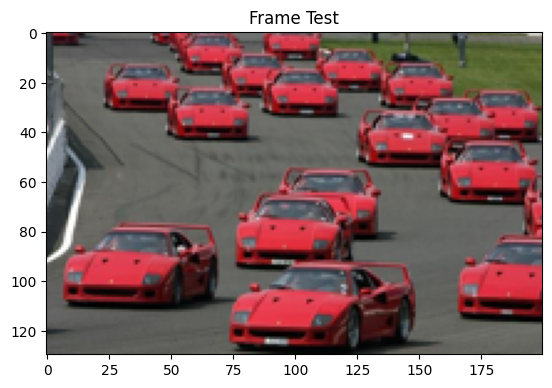

/home/blanca/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/blanca/.local/lib/python3.10/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [ ]:
im_test= Image.open("auto/otra.jpeg") # otra.jpeg
#im_test= Image.open("auto/im116.png") # otra.jpeg

im_test = np.array(im_test.resize((200, 130)))
# Despliegue
plt.title('Frame Test')
plt.imshow(im_test)
plt.show()

#Se extraen los componentes de la imagen de prueba
# RGB components
im_r = imagen2vector_test(im_test[:, :, 0])
im_g = imagen2vector_test(im_test[:, :, 1])
im_b = imagen2vector_test(im_test[:, :, 2])

# HSV componets
hsv_test = rgb2hsv(im_test)
hue_test = imagen2vector_test(hsv_test[:, :, 0])
sat_test = imagen2vector_test(hsv_test[:, :, 1])
value_test = imagen2vector_test(hsv_test[:, :, 2])

# Gray
img_test = imagen2vector_test(rgb2gray(im_test))

# Mediana
imm = imagen2vector_test(median(img_test, disk(5)))

# Entropia
ime = imagen2vector_test(entropy(img_test, disk(9)))

# Sobel
imso = imagen2vector_test(sobel(img_test))

# Patrones locales binarios
radius = 3
n_points = 8 * radius
imlp = imagen2vector_test(local_binary_pattern(img_test, n_points, radius))

In [ ]:
#Concatena todas las características extraídas de la imagen de prueba
ima_concatenada=np.concatenate([im_r, im_g, im_b, hue_test, sat_test, value_test, img_test, imm,ime,imso,imlp], axis = 1)
df_test = pd.DataFrame(ima_concatenada, columns=["Rojo", "Verde","Azul","Hue", "Saturation","Valor", "Grices","Mediana","Entropia","Sobel","Patrones_locales"])
#Se muestra el dataframe de la imagen de prueba
df_test

Rojo  Verde   Azul       Hue  Saturation     Valor    Grices  \
0       58.0   77.0   82.0  0.534722    0.292683  0.321569  0.287541   
1       47.0   65.0   62.0  0.472222    0.276923  0.254902  0.239054   
2       94.0   52.0   55.0  0.988095    0.446809  0.368627  0.239770   
3      200.0   75.0   90.0  0.980000    0.625000  0.784314  0.402525   
4      212.0   52.0   69.0  0.982292    0.754717  0.831373  0.342062   
...      ...    ...    ...       ...         ...       ...       ...   
25995  100.0  101.0   95.0  0.194444    0.059406  0.396078  0.393549   
25996  101.0  102.0   96.0  0.194444    0.058824  0.400000  0.397470   
25997  103.0  104.0   98.0  0.194444    0.057692  0.407843  0.405313   
25998  106.0  107.0  102.0  0.200000    0.046729  0.419608  0.417361   
25999  103.0  104.0   99.0  0.200000    0.048077  0.407843  0.405596   

        Mediana  Entropia     Sobel  Patrones_locales  
0      0.287541  2.921928  0.034286          262144.0  
1      0.287541  3.095795  0.033779          262144.0  
2      0.287541  3.251629  0.115592          262144.0  
3      0.342062  3.392747  0.072331               0.0  
4      0.345960  3.521641  0.039998          262144.0  
...         ...       ...       ...               ...  
25995  0.393549  2.610577  0.011092          262144.0  
25996  0.397470  2.565448  0.008319          262144.0  
25997  0.405313  2.625815  0.014065               0.0  
25998  0.405596  2.663533  0.000200               0.0  
25999  0.405596  2.446439  0.008319               0.0  

[26000 rows x 11 columns]

----------------------------------------------------------------

#### Parte exclusiva de PCA

In [ ]:
#Transformando df_test hacia los componentes
ima_test = pca.transform(df_test)
ima_test.shape

(26000, 2)

----------------------------------------------------------------

#### Parte exclusiva para SFS forward y backward

In [ ]:
# Seleccion de variables de interés
ima_test=df_test.loc[:,variables]
ima_test

Rojo   Azul    Grices   Mediana  Patrones_locales
0       58.0   82.0  0.287541  0.287541          262144.0
1       47.0   62.0  0.239054  0.287541          262144.0
2       94.0   55.0  0.239770  0.287541          262144.0
3      200.0   90.0  0.402525  0.342062               0.0
4      212.0   69.0  0.342062  0.345960          262144.0
...      ...    ...       ...       ...               ...
25995  100.0   95.0  0.393549  0.393549          262144.0
25996  101.0   96.0  0.397470  0.397470          262144.0
25997  103.0   98.0  0.405313  0.405313               0.0
25998  106.0  102.0  0.417361  0.405596               0.0
25999  103.0   99.0  0.405596  0.405596               0.0

[26000 rows x 5 columns]

-----------------------------------------------

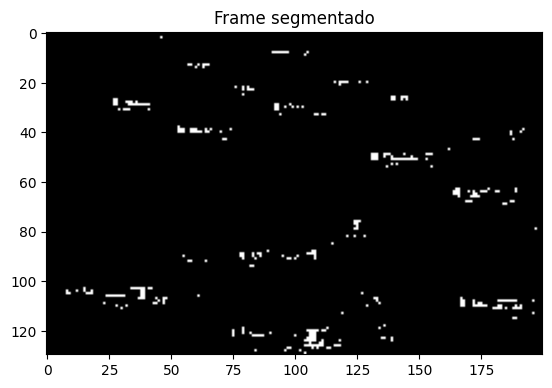

In [ ]:
#Predicción
ima_segmentada=clf.predict(ima_test)

#Reshape de la imagen segmentada
ima_segmentada=ima_segmentada.reshape(130, 200)

# Plotting
plt.title('Frame segmentado')
plt.imshow(ima_segmentada, cmap='gray')
plt.show()

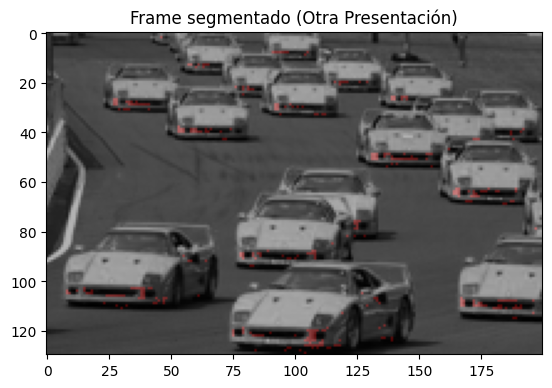

In [ ]:
from skimage.measure import label, regionprops
from skimage.color import label2rgb

#Convertir una matriz de etiquetas en una imagen RGB
image_label = label2rgb(ima_segmentada, image=im_test, bg_label=0)

# Plotting
plt.title('Frame segmentado (Otra Presentación)')
plt.imshow(image_label)
plt.show()

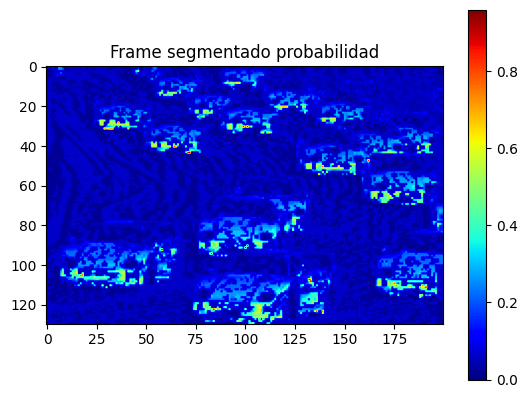

In [ ]:
#Visualizando probabilidades
ima_segmentada_pro=clf.predict_proba(ima_test)
ima_segmentada_pro=ima_segmentada_pro[:,1]

#Reshape
ima_segmentada_pro=ima_segmentada_pro.reshape(130, 200)

# Plotting
plt.title('Frame segmentado probabilidad')
plt.imshow(ima_segmentada_pro, cmap='jet')
plt.colorbar()
plt.show()

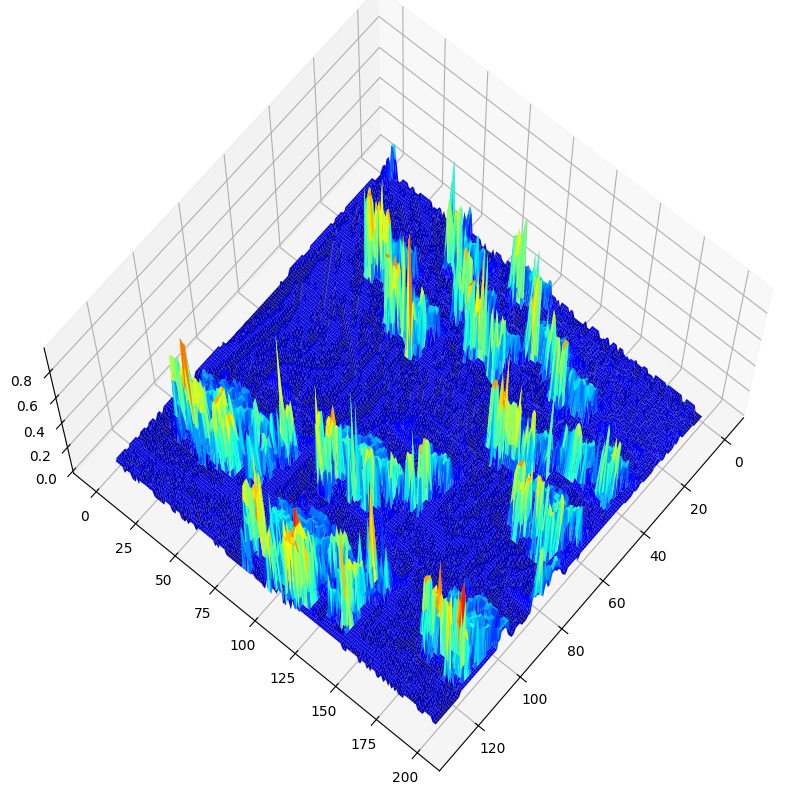

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
xx, yy = np.mgrid[0:ima_segmentada_pro.shape[0], 0:ima_segmentada_pro.shape[1]]

fig = plt.figure(figsize=(10,10))
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(xx, yy, ima_segmentada_pro,rstride=1, cstride=1, cmap=plt.cm.jet,
                linewidth=0)
ax.view_init(70, 40)
plt.show()

/home/blanca/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


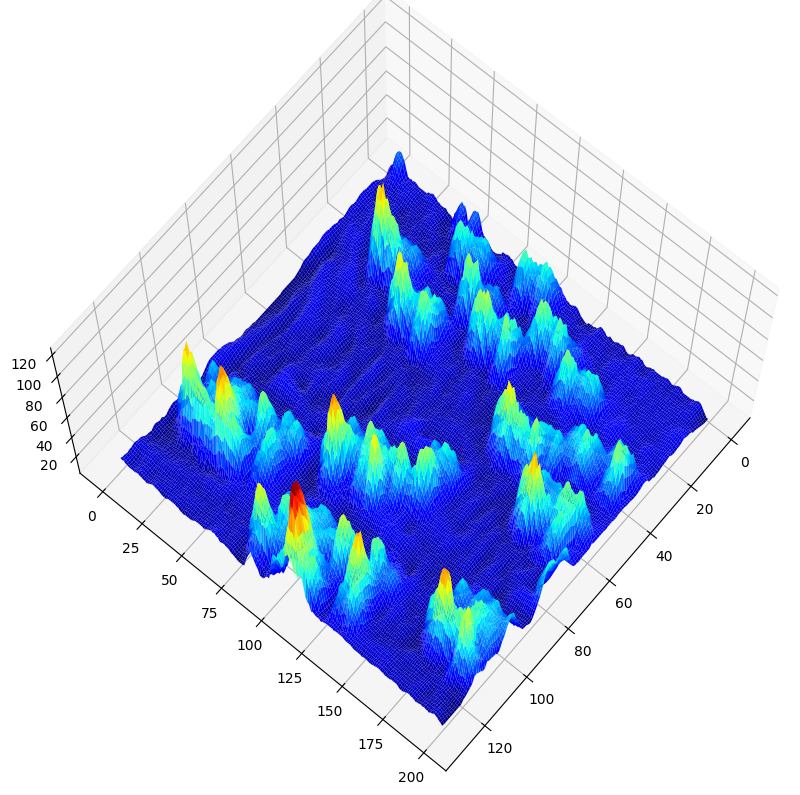

In [ ]:
from skimage.filters.rank import mean

#Return local mean of an image.
ima_segmetada_pro = mean(ima_segmentada_pro, disk(3))

xx, yy = np.mgrid[0:ima_segmentada_pro.shape[0], 0:ima_segmetada_pro.shape[1]]

#Plotting
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(xx, yy, ima_segmetada_pro,rstride=1, cstride=1, cmap=plt.cm.jet,linewidth=0)

ax.view_init(70, 40)
plt.show()


In [ ]:
ima_segmetada_pro_bin=ima_segmetada_pro>75

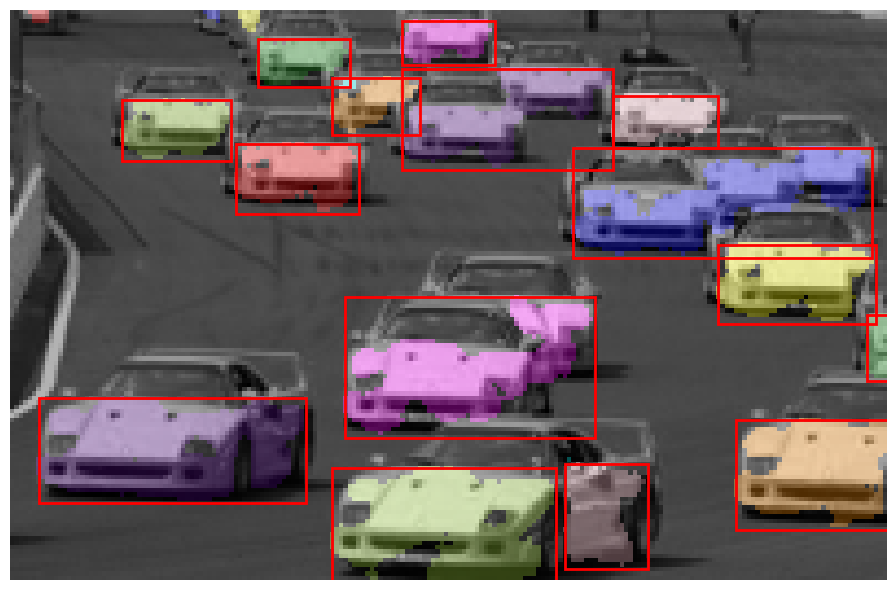

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = ima_segmetada_pro_bin

# label image regions
label_image = label(cleared)

# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=im_test, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 20:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()